In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
youtube = pd.read_csv('USvideos1.csv')

In [3]:
youtube['likes'].describe()

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

In [3]:
Q1 = youtube['likes'].describe()['25%']
Q3 = youtube['likes'].describe()['75%']
IQR = Q3 - Q1

In [4]:
def ganti_tanggal_trending(cols):
    year = cols[0:2]
    month = cols[6:8]
    day = cols[3:5]
    cols = '20{}.{}.{}'.format(year,month,day)
    return cols

youtube['trending_date'] = youtube['trending_date'].apply(ganti_tanggal_trending)

In [5]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'],utc='none')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])

In [6]:
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']

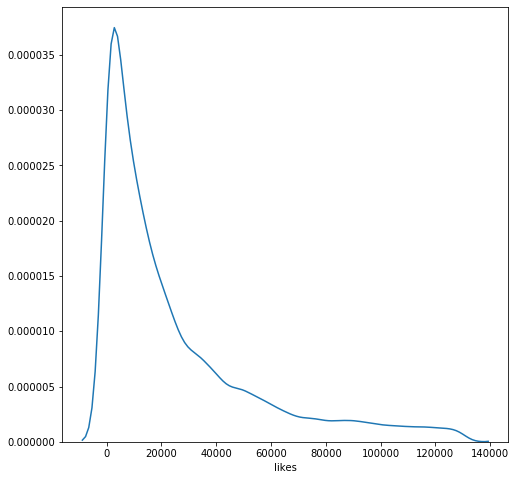

In [7]:
plt.figure(figsize = (8,8))
sns.distplot(youtube[(youtube['likes'] >= Q1 - (1.5*IQR)) & (youtube['likes'] <= Q3 + (1.5*IQR))]['likes'], hist = False)

## SHOW NO_OUTLIER DATA

In [8]:
# data_clean = youtube.copy()
data_clean = youtube[(youtube['likes'] >= Q1 - (1.5*IQR)) & (youtube['likes'] <= Q3 + (1.5*IQR))]
# data_clean.reset_index()
data_clean.reset_index(drop=True,inplace=True)

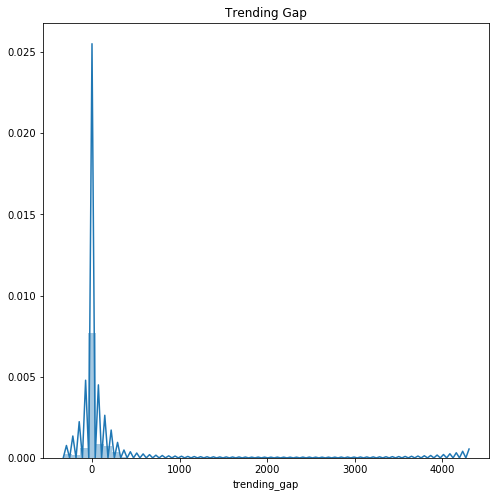

In [9]:
plt.figure(figsize=(8,8))
plt.title('Trending Gap')
sns.distplot(data_clean['trending_gap'].dt.days)

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


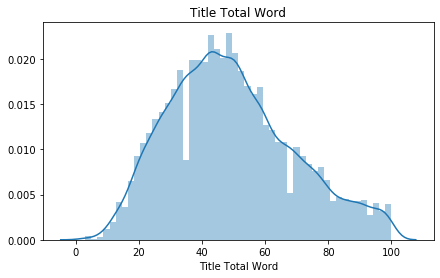

In [10]:
data_clean['Title Total Word'] = data_clean['title'].str.len()

plt.figure(figsize=(7,4))
plt.title('Title Total Word')
sns.distplot(data_clean['Title Total Word'])

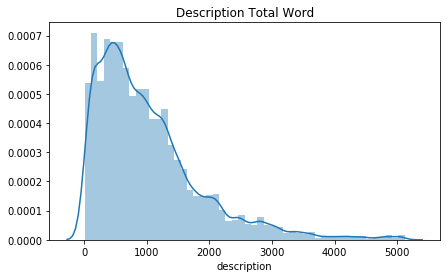

In [15]:
def char_counter2(cols):
    return len(str(cols))

plt.figure(figsize=(7,4))
plt.title('Description Total Word')
sns.distplot(data_clean['description'].apply(char_counter2))

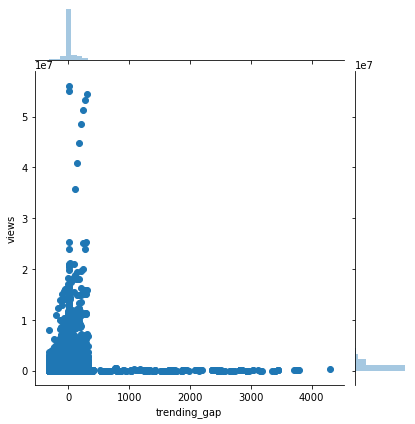

In [16]:
sns.jointplot(x=data_clean['trending_gap'].dt.days,y=data_clean['views'])

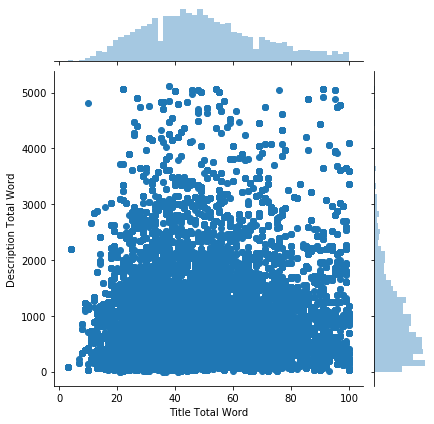

In [17]:
sns.jointplot(x='Title Total Word',y='Description Total Word',data=data_clean)

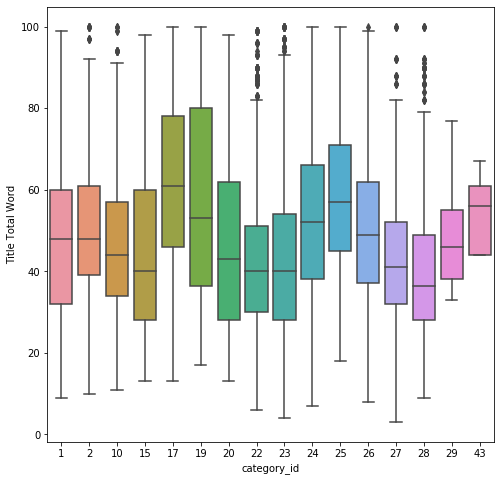

In [18]:
plt.figure(figsize=(8,8))
sns.boxplot(x='category_id', y='Title Total Word', data=data_clean)

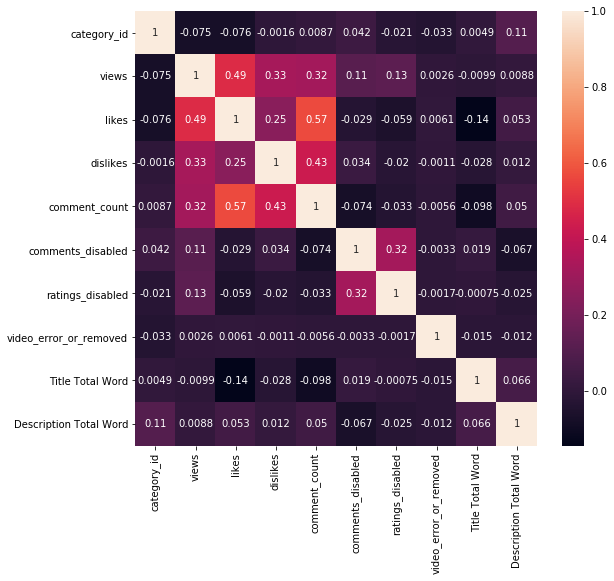

In [21]:
plt.figure(figsize=(9,8))
sns.heatmap(data_clean.corr(),annot = True)